<a href="https://colab.research.google.com/github/aldonugraha/DFS-dan-BFS/blob/main/Tugas_DFS_dan_BFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keterangan Kota pada dataset :
A=Subang
B=Bandung
C=Cimahi
D=Lembang
E=Purwakarta
F=Karawang
G=Garut
H=Sumedang
I=Indramayu
J=Jakarta
K=Kuningan
L=Bogor
M=Majalengka

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Persiapan dan Input Data**

In [67]:
#Melakukan input data
list1 = []
list2 = []
with open('/content/drive/MyDrive/Sistem cerdas/Fix datase.txt') as fp:
  text = fp.readlines()
  for ele in text:
    list1.append(ele.strip())
  for i in list1:
    i2 = str(i).replace(" ","")
    list2.append(i2)
print(list2)
  

['ABCDE', 'BAF', 'FBJ', 'JFK', 'CAG', 'GCHK', 'KGJ', 'DAH', 'HDGL', 'LH', 'EAI', 'IEM', 'MI']


In [68]:
#Ubah inputan pada direktori
graph = {}
dct_item = []
dct_key = [] 
for ele in list2:
  dct_item.append(list(ele[1:]))
  dct_key.append(ele[0])
graph = dict(zip(dct_key, dct_item))
print(graph)

{'A': ['B', 'C', 'D', 'E'], 'B': ['A', 'F'], 'F': ['B', 'J'], 'J': ['F', 'K'], 'C': ['A', 'G'], 'G': ['C', 'H', 'K'], 'K': ['G', 'J'], 'D': ['A', 'H'], 'H': ['D', 'G', 'L'], 'L': ['H'], 'E': ['A', 'I'], 'I': ['E', 'M'], 'M': ['I']}


In [69]:
start = input('Masukan inisial kota awal: ')
end = input('Masukan isial kota tujuan: ')
start = start.upper()
end = end.upper()

Masukan inisial kota awal: B
Masukan isial kota tujuan: A


# Breadth First Search

In [70]:
#Mencari dan memperluas node
visited_bfs = [] #List variabel pada node yg telah dikunjungi.
queue_bfs = []     #Inisialisasi Antrian

def bfs(visited, graph, node):
  visited_bfs.append(node)
  queue_bfs.append(node)
  while queue_bfs:
    s = queue_bfs.pop(0) 
    print (s," ", end = "") 
 
    if s == end:
      break
    for neighbour in graph[s]:
      if neighbour not in visited_bfs:
        visited_bfs.append(neighbour)
        queue_bfs.append(neighbour)

print("Expand: ", end="")
bfs(visited_bfs, graph, start) 

Expand: B  A  

In [71]:
#Temukan jalur perpendek
def shortestbfs(graph, start, end):
   
    queue_bfs = []
    queue_bfs.append([start])
    while queue_bfs:
        path = queue_bfs.pop(0)
        node = path[-1]

        if node == end:
            return path
        
        for adjacent in graph.get(node, []):
            new_path = list(path)
            new_path.append(adjacent)
            queue_bfs.append(new_path)

print("Path: ", shortestbfs(graph, start, end))

Path:  ['B', 'A']


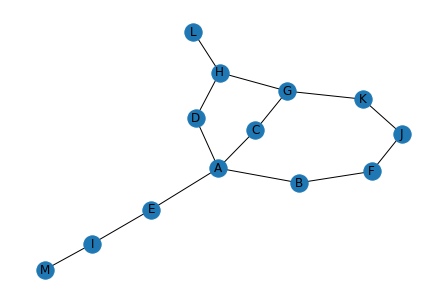

In [72]:
#Membuat gambar grafik
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

bfs_value_list = []
bfs_key_list = []
j = 0

for key, value in graph.items():
  i = 0
  if len(value) > 1:
    while i < len(value):
      bfs_key_list.append(key)
      i = i + 1
  else:
    bfs_key_list.append(key)
#Tampilkan list kunci

for key, value in graph.items():
  for i in value:
    #Tampilkan nilai i
    bfs_value_list.append(i)

#Tampilkan list nilai

df = pd.DataFrame({'from': bfs_key_list, 'to': bfs_value_list})

# Buat grap
G = nx.from_pandas_edgelist(df, 'from', 'to')

nx.draw(G, with_labels=True)
plt.show()

# Depth First Search

In [73]:
#Mencari dan memperluas node
visited = set() # Pengaturan untuk melacak node yg telah dikunjungi
print ('Expand: ',end='')
def dfs(visited, graph, node):
    
    if node not in visited:
        print (node, sep=' ', end=' ')
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)
            
dfs(visited, graph, start)

Expand: B A C G H D L K J F E I M 

In [74]:
#Temukan jalur perpendek
print('Path: ', end='')
paths = list(dfs_paths(graph, start, end))
lens = []
for i in list(dfs_paths(graph, start, end)):
  lens.append(len(i))

sorted(list(zip(lens, paths)))[0][1]

Path: 

['B', 'A']

In [75]:
# DFS

def dfs_paths(graph, start, goal, path=None):
    if path is None:
        path = [start]
    if start == goal:
        yield path
    for next in set(graph[start]) - set(path):
        yield from dfs_paths(graph, next, goal, path + [next])

list(dfs_paths(graph, start, end))


[['B', 'A'],
 ['B', 'F', 'J', 'K', 'G', 'H', 'D', 'A'],
 ['B', 'F', 'J', 'K', 'G', 'C', 'A']]